In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("qol2014_DATA.csv")

#Removing duplicate columns
df.drop('CommID.1', axis = 1, inplace=True)
df.drop('FIPSPL.1', axis = 1, inplace=True)
df

,CommID,FIPSPL,Name,CAT,QOLjobs_vg,QOLjobs_g,QOLjobs_f,QOLjobs_p,QOLjobs_dnk,QOLjobs_na,...,QOLwater_f,QOLwater_p,QOLwater_dnk,QOLwater_na,QOLgovtsrvall_vg,QOLgovtsrvall_g,QOLgovtsrvall_f,QOLgovtsrvall_p,QOLgovtsrvall_dnk,QOLgovtsrvall_na
0,1.0,1900595,Afton,ALL,4.598,15.540,36.190,20.392,18.926,4.354,...,1.047,2.051,10.353,0.000,16.842,40.269,21.873,1.698,13.902,5.417
1,2.0,1900640,Agency,ALL,5.603,5.505,18.931,19.436,20.607,29.917,...,11.568,0.606,2.252,1.646,19.910,48.845,9.136,3.595,15.625,2.890
2,3.0,1900730,Ainsworth,ALL,0.000,5.466,12.287,47.645,22.083,12.518,...,2.219,18.627,36.657,3.396,12.677,37.688,6.490,16.050,25.603,1.492
3,4.0,1900865,Albert City,ALL,2.997,30.724,28.957,25.919,8.342,3.061,...,23.991,2.660,13.154,3.398,30.067,36.704,17.852,1.459,8.192,5.726
4,5.0,1900910,Albia,ALL,28.692,17.600,31.755,11.329,7.399,3.226,...,7.213,5.191,1.348,3.249,11.272,41.701,13.070,0.000,32.170,1.786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,96.0,1984900,What Cheer,INC4,14.329,0.000,0.000,55.893,3.950,25.828,...,9.285,9.285,7.166,10.562,0.000,50.704,32.845,9.285,7.166,0.000
1309,97.0,1985845,Williamsburg,INC4,24.704,41.649,12.758,0.000,20.888,0.000,...,29.169,10.411,12.557,2.670,44.656,40.333,1.462,0.000,13.549,0.000
1310,98.0,1986385,Winfield,INC4,0.000,7.872,38.379,49.717,4.031,0.000,...,27.967,0.000,24.390,0.000,0.000,68.372,0.000,0.000,31.628,0.000
1311,99.0,1986970,Woodward,INC4,5.697,4.826,23.276,32.977,33.224,0.000,...,11.592,3.144,9.866,4.418,8.993,52.166,6.265,7.572,25.004,0.000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

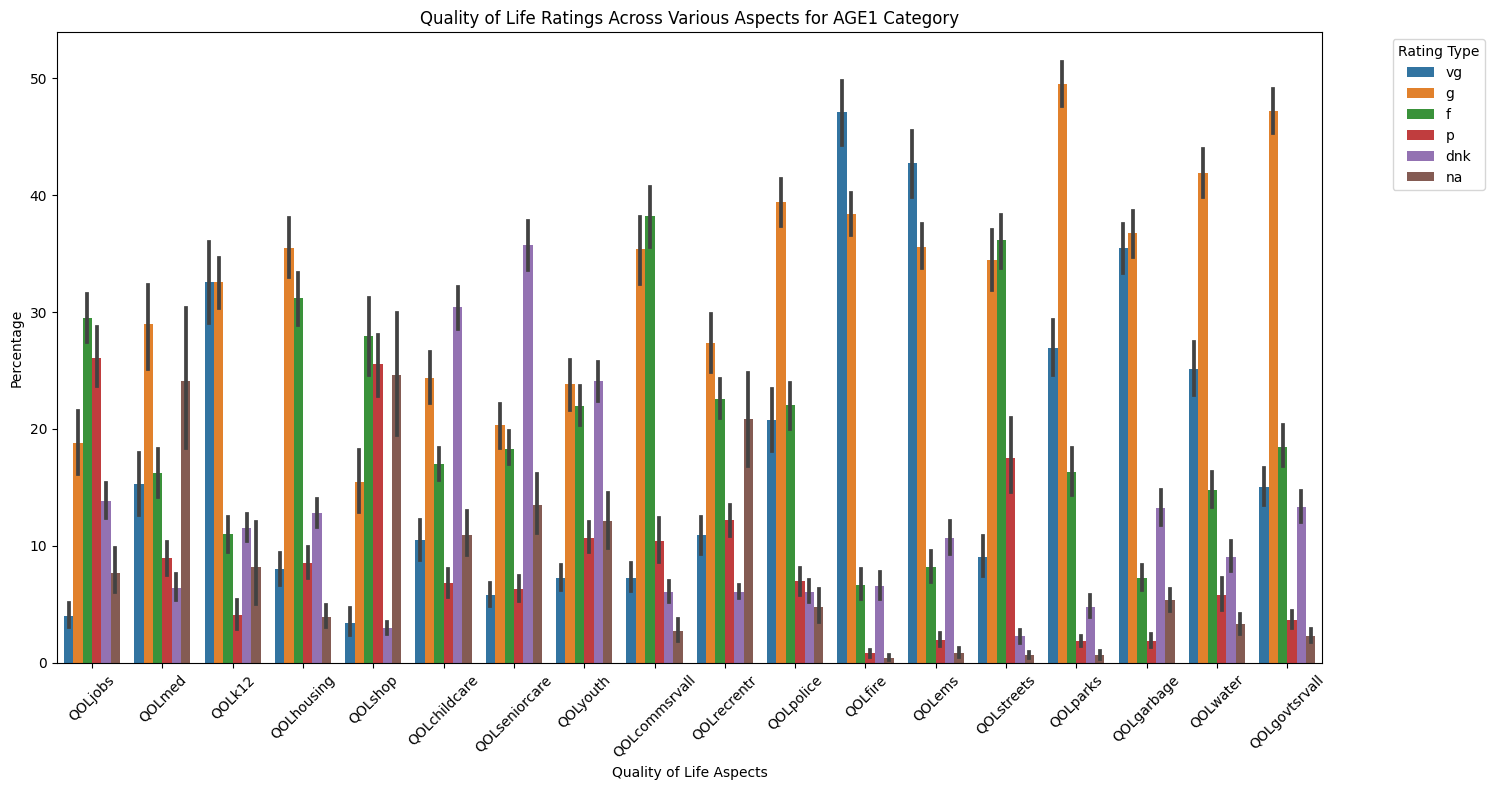

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the dataset for AGE1 category
age1_data_all_qol = df[df['CAT'] == 'ALL']

# Selecting only QOL columns and excluding non-QOL columns
qol_columns = [col for col in age1_data_all_qol.columns if col.startswith('QOL')]

# Narrowing down to the QOL columns
age1_qol_data = age1_data_all_qol[qol_columns]

# Melting the dataframe to format it for seaborn plotting
age1_qol_melted = age1_qol_data.melt(var_name='QOL_Rating', value_name='Percentage')

# Adding a column for QOL Aspect and Rating Type
age1_qol_melted['QOL_Aspect'] = age1_qol_melted['QOL_Rating'].str.split('_').str[0]
age1_qol_melted['Rating_Type'] = age1_qol_melted['QOL_Rating'].str.split('_').str[1]

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='QOL_Aspect', y='Percentage', hue='Rating_Type', data=age1_qol_melted)
plt.title('Quality of Life Ratings Across Various Aspects for AGE1 Category')
plt.xlabel('Quality of Life Aspects')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Rating Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

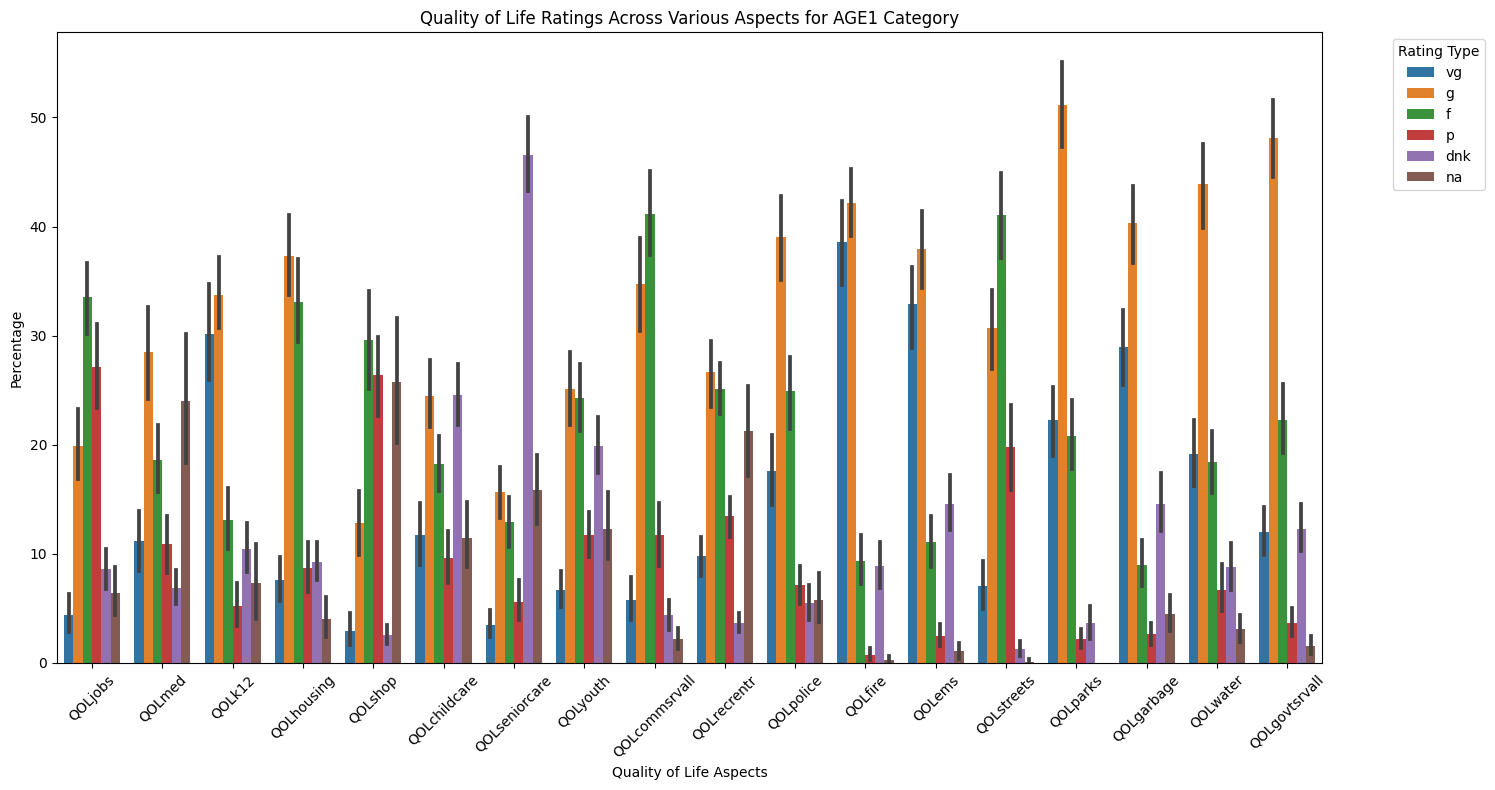

In [13]:
# Filtering the dataset for AGE1 category
age1_data_all_qol = df[df['CAT'] == 'AGE1']

# Selecting only QOL columns and excluding non-QOL columns
qol_columns = [col for col in age1_data_all_qol.columns if col.startswith('QOL')]

# Narrowing down to the QOL columns
age1_qol_data = age1_data_all_qol[qol_columns]

# Melting the dataframe to format it for seaborn plotting
age1_qol_melted = age1_qol_data.melt(var_name='QOL_Rating', value_name='Percentage')

# Adding a column for QOL Aspect and Rating Type
age1_qol_melted['QOL_Aspect'] = age1_qol_melted['QOL_Rating'].str.split('_').str[0]
age1_qol_melted['Rating_Type'] = age1_qol_melted['QOL_Rating'].str.split('_').str[1]

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='QOL_Aspect', y='Percentage', hue='Rating_Type', data=age1_qol_melted)
plt.title('Quality of Life Ratings Across Various Aspects for AGE1 Category')
plt.xlabel('Quality of Life Aspects')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Rating Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()